In [64]:
import statistics
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style="white", font_scale=0.9)

In [44]:
df_vote_average = pd.read_csv("/Users/iris/Desktop/GR5291Group8-master/Data/cleaned_movie_data_vote_average.csv")

In [45]:
Y_vote_average = df_vote_average[df_vote_average.columns[0]]
X_vote_average = df_vote_average[df_vote_average.columns[1:len(Y_vote_average)+1]]

In [46]:
# split data into training data 75%, test data 25%
seed = 123
test_size = 0.25
X_vote_average_train, X_vote_average_test, y_vote_average_train, y_vote_average_test = train_test_split(X_vote_average, Y_vote_average, test_size=test_size, random_state=seed)

In [74]:
# tune parameter
param_grid = {"n_estimators": [50, 100, 150, 200],
    "max_depth": [3, 5, 7, 9, 11],
    "max_features": [5, 7, 10, 13],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 3, 10],
    "bootstrap": [True, False]}

model = RandomForestRegressor(random_state=0)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid.fit(X_vote_average_train, y_vote_average_train)

print(grid.best_score_)
print(grid.best_params_)

0.5042808779197315
{'bootstrap': True, 'max_depth': 11, 'max_features': 13, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 150}


In [56]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: -0.353647 using {'max_depth': 11, 'n_estimators': 150}


-0.450895 (0.020147) with: {'max_depth': 3, 'n_estimators': 50}
-0.451755 (0.018240) with: {'max_depth': 3, 'n_estimators': 100}
-0.450813 (0.016215) with: {'max_depth': 3, 'n_estimators': 150}
-0.450541 (0.016014) with: {'max_depth': 3, 'n_estimators': 200}
-0.397613 (0.013514) with: {'max_depth': 5, 'n_estimators': 50}
-0.395974 (0.013050) with: {'max_depth': 5, 'n_estimators': 100}
-0.396252 (0.013113) with: {'max_depth': 5, 'n_estimators': 150}
-0.394178 (0.012880) with: {'max_depth': 5, 'n_estimators': 200}
-0.370120 (0.010238) with: {'max_depth': 7, 'n_estimators': 50}
-0.368983 (0.009403) with: {'max_depth': 7, 'n_estimators': 100}
-0.368525 (0.009903) with: {'max_depth': 7, 'n_estimators': 150}
-0.368048 (0.008994) with: {'max_depth': 7, 'n_estimators': 200}
-0.359852 (0.007794) with: {'max_depth': 9, 'n_estimators': 50}
-0.358168 (0.009462) with: {'max_depth': 9, 'n_estimators': 100}
-0.358621 (0.011341) with: {'max_depth': 9, 'n_estimators': 150}
-0.357086 (0.010488) with: {'

Text(0,0.5,'MSE')

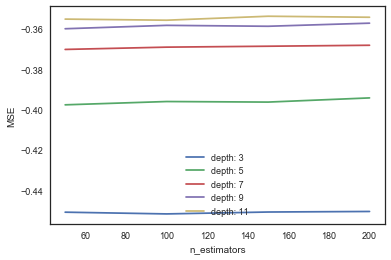

In [75]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))
# plot results
scores = np.array(means).reshape(len(max_depth), len(n_estimators))
for i, value in enumerate(max_depth):
    plt.plot(n_estimators, scores[i], label='depth: ' + str(value))
plt.legend()
plt.xlabel('n_estimators')
plt.ylabel('MSE')

In [133]:
#fit best model
best_model = RandomForestRegressor(max_depth=11, n_estimators=150)

In [134]:
# training error of best model(MAPE)
best_model.fit(X_vote_average_train, y_vote_average_train)
y_vote_average_pred_train = best_model.predict(X_vote_average_train)
statistics.mean(abs((y_vote_average_pred_train-y_vote_average_train)/y_vote_average_train))

0.0473593767630791

In [141]:
# R squared
best_model.score(X_vote_average_test, y_vote_average_test)

0.49796478695147095

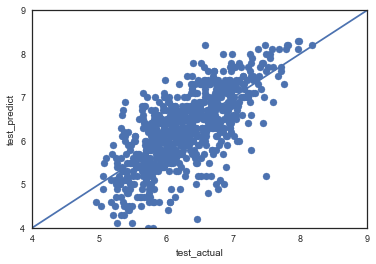

In [136]:
#plot the predicted values against the actual values
plt.scatter(x=y_vote_average_pred, y=y_vote_average_test)
plt.xlim([4,9])
plt.ylim([4,9])
plt.plot([4,9],[4,9])
plt.xlabel('test_actual')
plt.ylabel('test_predict')
plt.show()

In [137]:
# test error of best model(MAPE)
best_model.fit(X_vote_average_train, y_vote_average_train)
y_vote_average_pred = best_model.predict(X_vote_average_test)
statistics.mean(abs((y_vote_average_pred-y_vote_average_test)/y_vote_average_test))

0.08235857146604016

In [138]:
# Interpreting the model
feature_import = pd.DataFrame(data=best_model.feature_importances_, index=X_vote_average.columns.values, columns=['values'])
feature_import.sort_values(['values'], ascending=False, inplace=True)
feature_import.transpose()

,vote_count,runtime,year,Drama,month,minority_studios,Action,majority_studios,Documentary,Science.Fiction,...,History,L32,L53,L14,L27,L6,L10,L50,Foreign,L54
values,0.309971,0.191213,0.135947,0.11077,0.037753,0.029257,0.017507,0.014377,0.01244,0.010969,...,0.001811,0.001225,0.001189,0.000751,0.000746,0.000322,0.000311,0.000255,0.000175,0.000145


In [139]:
feature_import.iloc[0:15,:]

,values
vote_count,0.309971
runtime,0.191213
year,0.135947
Drama,0.110770
month,0.037753
minority_studios,0.029257
Action,0.017507
majority_studios,0.014377
Documentary,0.012440
Science.Fiction,0.010969


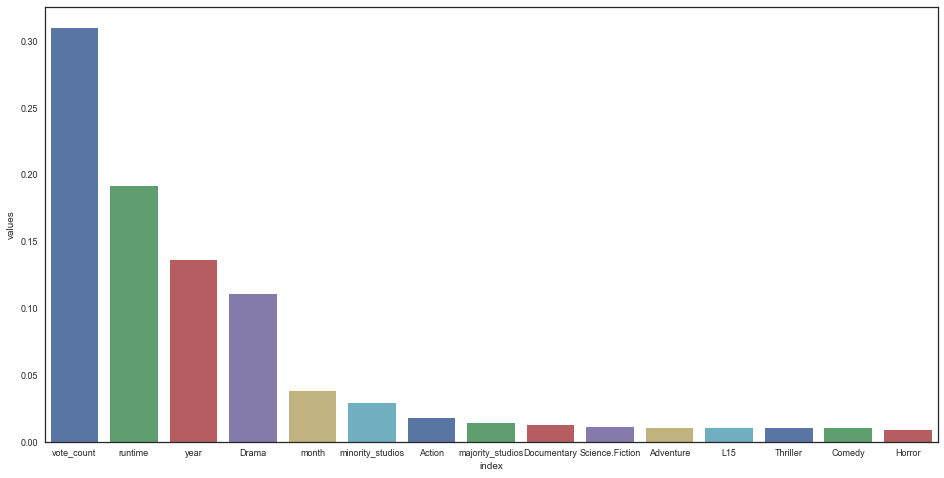

In [140]:
plt.figure(figsize=(16,8))
feature_import=feature_import.iloc[0:15,:]
feature_import.reset_index(level=0, inplace=True)
sns.barplot(x='index', y='values', data=feature_import, palette='deep')
plt.show()